In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
with open('../../spbu-ai-fundamentals/config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

В этой теме мы поработаем с данными, посвященными определению рака молочной железы на основе различных признаков анализа клеток в биопсии (радиус, кривизна, симметрия). Известно, что этот датасет линейно разделим.

In [4]:
df = pd.read_csv("../wdbc.tar/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Задание**: Проведите краткий EDA. Есть ли выбросы в данных, какие столбцы коррелируют больше всего, стоит ли преобразоывавть какие-то признаки? Хватит 3-4 графиков или таблиц (но можно больше).

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

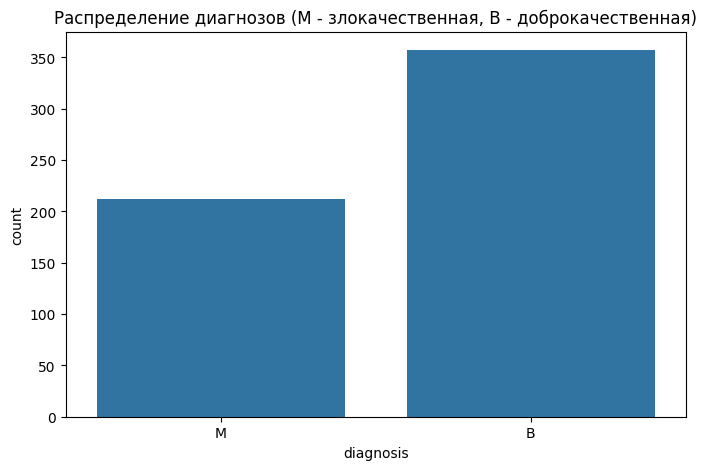

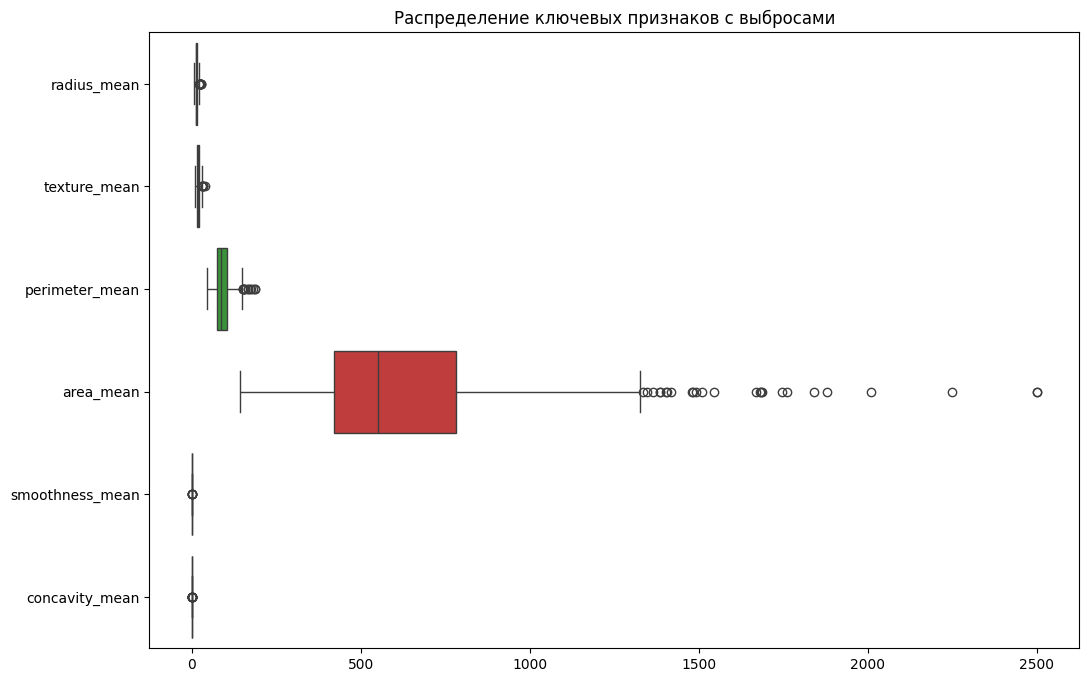

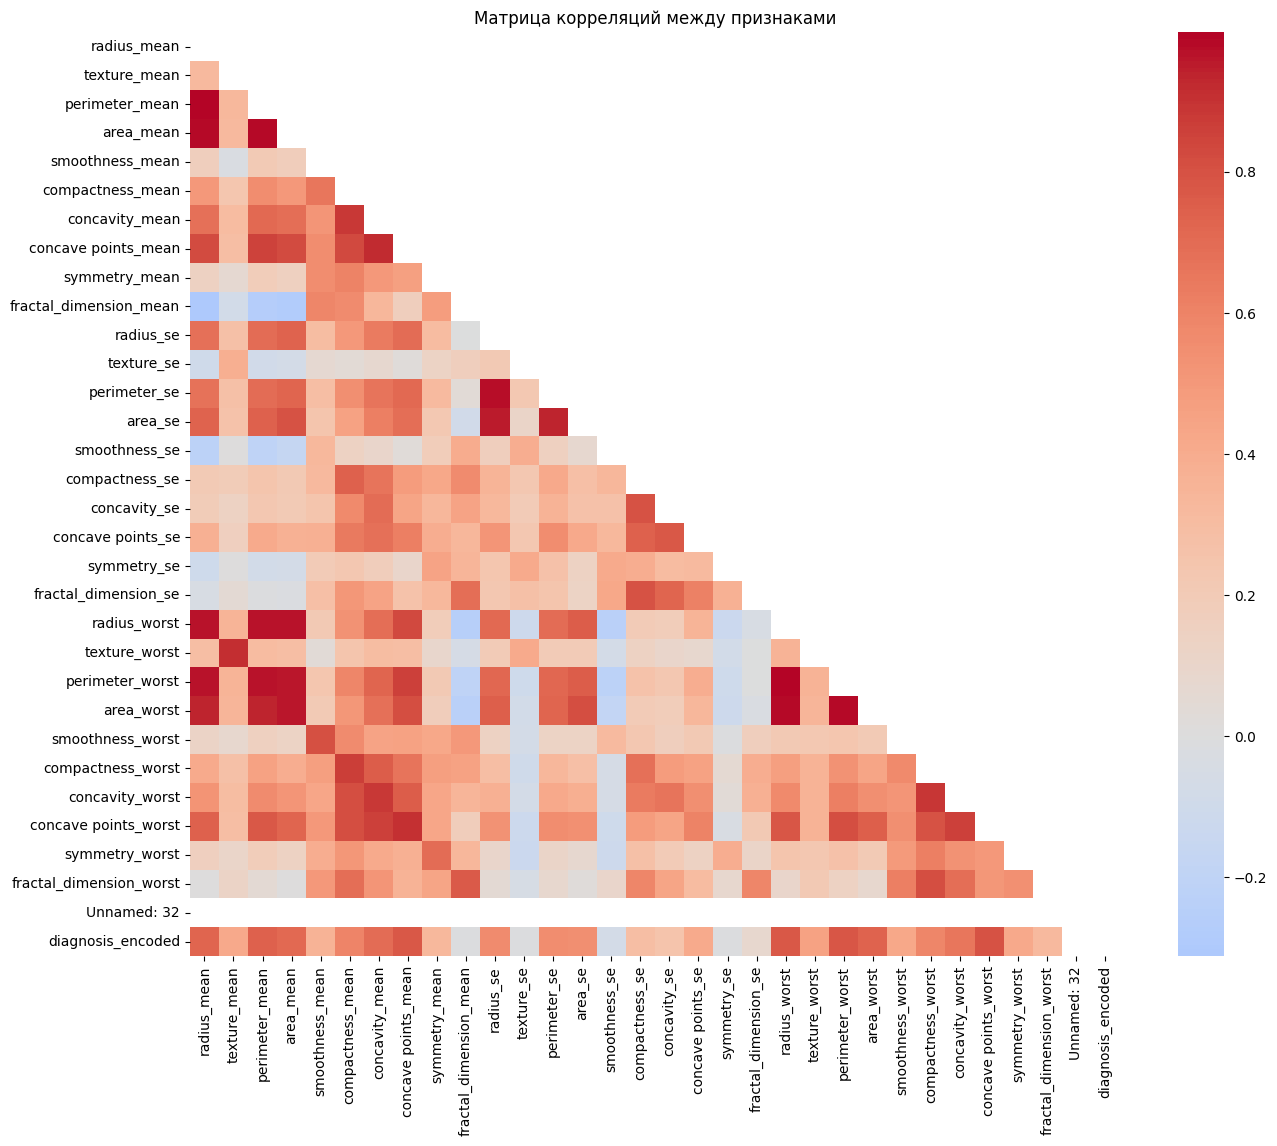

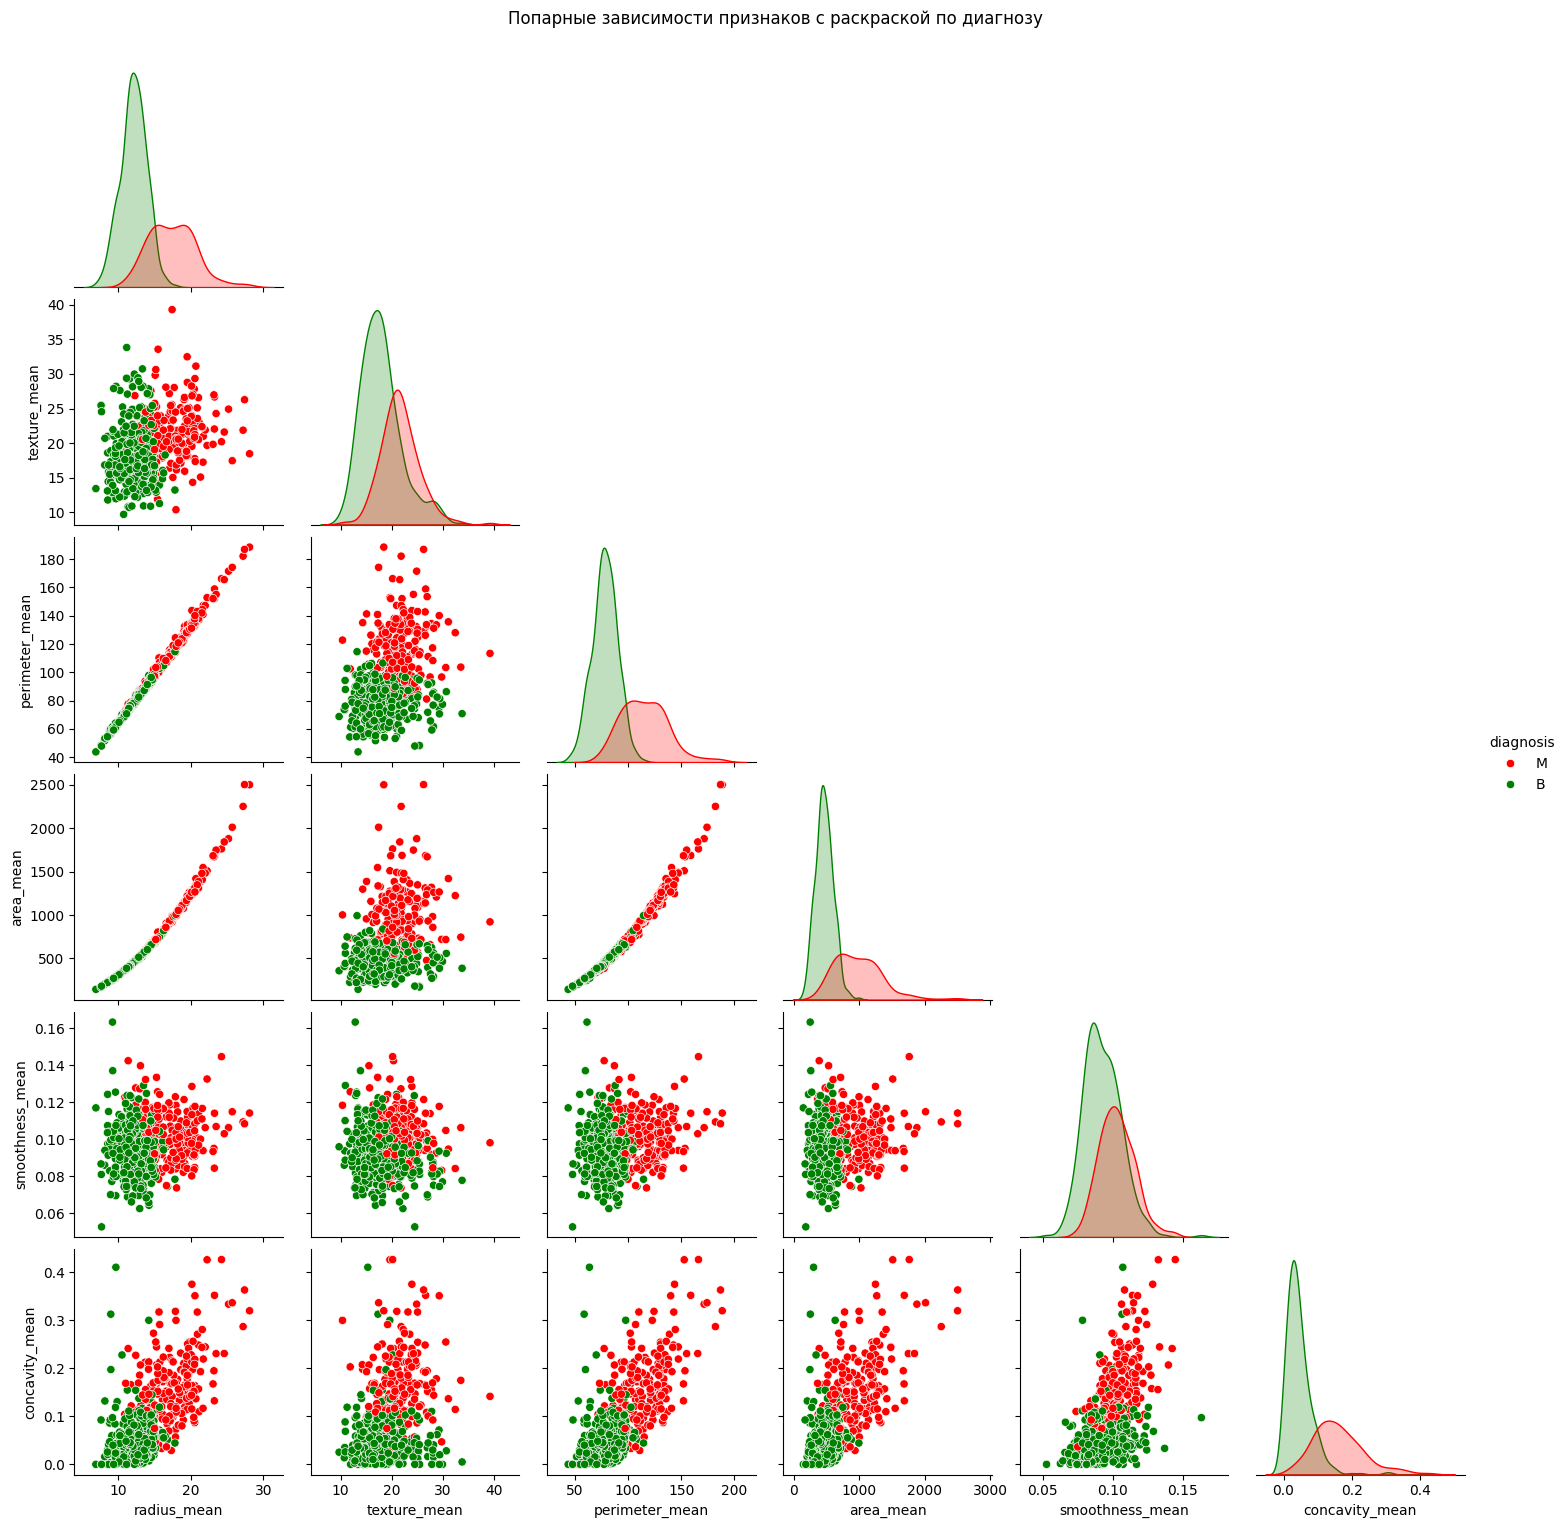

In [6]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

print(df.describe())

plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis', data=df)
plt.title('Распределение диагнозов (M - злокачественная, B - доброкачественная)')
plt.show()

plt.figure(figsize=(12,8))
cols_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean']
sns.boxplot(data=df[cols_to_plot], orient='h')
plt.title('Распределение ключевых признаков с выбросами')
plt.show()

le = LabelEncoder()
df['diagnosis_encoded'] = le.fit_transform(df['diagnosis'])

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'id']

plt.figure(figsize=(15,12))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, 
            mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title('Матрица корреляций между признаками')
plt.show()

sns.pairplot(df[cols_to_plot + ['diagnosis']], hue='diagnosis', palette={'M':'red', 'B':'green'}, corner=True)
plt.suptitle('Попарные зависимости признаков с раскраской по диагнозу', y=1.02)
plt.show()

In [9]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)
df.head()

C:\Users\nikol\AppData\Local\Temp\ipykernel_10004\2950225700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Задание**: выведите, сколько в датасете примеров позитивного и негативного класса.

In [8]:
class_counts = df['diagnosis'].value_counts()

print(f"Доброкачественные: {class_counts[0]}")
print(f"Злокачественные: {class_counts[1]}")

Доброкачественные: 357
Злокачественные: 212


C:\Users\Romchik\AppData\Local\Temp\ipykernel_25984\3469526760.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Доброкачественные: {class_counts[0]}")
C:\Users\Romchik\AppData\Local\Temp\ipykernel_25984\3469526760.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Злокачественные: {class_counts[1]}")


In [11]:
target = 'diagnosis'
features = list(df.columns)
features.remove('diagnosis')
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [12]:
X = df[features]
y = df[[target]]

Попробуем обучить логистическую регрессию на этих данных. Обратите внимание, что по умолчанию применяется L2 регуляризация,мы будем строить предсказания без нее. Однако, в качестве упражнения, сравним результаты с масштабированием признаков и без.

**Задание**: оцените, насколько сбалансированы признаки по масштабу. Попробуйте ответить до запуска кода, стоит ли их сначала масштабировать и почему. 

In [ ]:
radius_mean: 11.42-20.57 

perimeter_mean: 77.58-135.10

area_mean: 386.1-1326.0

smoothness_mean: 0.08474-0.14250

concavity_mean: 0.07864-0.3001


area_mean (до 1326) vs smoothness_mean (0.08) — разница в 16,000 раз

perimeter_mean больше radius_mean в ~6-7 раз (ОЧЕВИДНО ЧТО НУЖНО МАСШТАБИРОВАТЬ)

Без масштабирования:

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

E:\projects\spbu_machine_learning_spring_2025\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9385964912280702

С масштабированием:

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.956140350877193

Все классификаторы в Sklearn имеют два режима - предсказание лейблов и вероятностей. Предсказание вероятностей дает нам необработанные оценки принадлежности к тому или иному классу. Модель в таком случае возвращает вектор (для каждого семпла) размера N (где N - число классов). 

**Вопрос**: Какого размера будет предсказание в случае бинарной логистической регрессии? А многоклассовой? Другими словами, в каких случаях негативный класс добавляется как отдельный?

In [43]:
df_results = pd.DataFrame({
    'pred': clf.predict(X_test).reshape(-1),
    'pred_proba': clf.predict_proba(X_test)[:, 1],
    'true': y_test.reshape(-1),
})

**Задание**: Постройте матрицу предсказаний 100x2 для регрессии с двумя классами, где в каждой строке будут случайные значения. 
1) Получите из этого оценку принадлежности к классу с помощью сигмоиды и софтмакса. 
2) Постройте предсказание класса. В случае сигмоиды предсказывайте принадлежность к классу на основе границы, софтмакса - по максимальной вероятности

**Вопрос***: как еще можно предсказать класс? Всегда ли нужно брать именно эти функции?

In [11]:
import numpy as np

np.random.seed(42)
logits = np.random.randn(100, 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid_probs = sigmoid(logits[:, 1] - logits[:, 0])  

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

softmax_probs = softmax(logits)

sigmoid_pred = (sigmoid_probs > 0.5).astype(int)

softmax_pred = np.argmax(softmax_probs, axis=1)

print("Пример логитов:\n", logits[:5])
print("Сигмоидные вероятности:\n", sigmoid_probs[:5])
print("Софтмакс вероятности:\n", softmax_probs[:5])
print("Предсказания по сигмоиде:\n", sigmoid_pred[:5])
print("Предсказания по софтмаксу:\n", softmax_pred[:5])


Пример логитов:
 [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
Сигмоидные вероятности:
 [0.34638255 0.7058559  0.5000041  0.30751173 0.7334181 ]
Софтмакс вероятности:
 [[0.65361745 0.34638255]
 [0.2941441  0.7058559 ]
 [0.4999959  0.5000041 ]
 [0.69248827 0.30751173]
 [0.2665819  0.7334181 ]]
Предсказания по сигмоиде:
 [0 1 1 0 1]
Предсказания по софтмаксу:
 [0 1 1 0 1]


Предсказать можно и по другому. Например SVM предсказывает класс по знаку расстояния до гиперплоскости.

In [13]:
df_results.head(20)

,pred,pred_proba,true
0,1,0.997461,1
1,0,0.000033,0
2,1,0.999414,1
3,1,1.000000,1
4,0,0.000006,0
5,0,0.000568,0
6,0,0.099563,0
7,0,0.000691,0
8,0,0.008883,0
9,0,0.000003,0


# Метрики классификации


## Метрики на основе лейблов
Рассмотрим, какие у нас могут быть тезультаты классификации.

* TP (true positive) - правильно предсказали: рак есть, что модель и предсказала
* FP (false positive) - неправильно предсказали: рака нет,  а модель предсказала, что есть (1st order error)
* FN (false negative) - неправильно предсказали: рак вообще-то есть,  а модель предсказала, что нет (2nd order error)!
* TN (true negative) - правильно предсказали: рака нет, что модель и предсказала


Pos/Neg - общее количество объектов класса 1/0

Метрики:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$ - Доля правильных ответов
* $ \text{Error rate} = 1 -\text{accuracy}$ - Доля ошибок
* $ \text{Precision} =\frac{TP}{TP + FP}$ - Точность
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - Полнота
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$ F-мера (часто используют F1-меру, где $\beta=1$)

### ROC кривая

ROC кривая измеряет насколько хорошо классификатор разделяет два класса. Она построена на предсказании вероятности. Площадь под ней (ROC-AUC) является неплохой оценкой общего качества предсказаний. 
 
Пусть $y_{\rm i}$ - истинная метрка и $\hat{y}_{\rm i}$ - прогноз вероятности для $i^{\rm th}$ объекта.

Число положительных и отрицательных объектов: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$.

Для каждого порогового значения вероятности $\tau$ считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation}
TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] = \frac{TP(\tau)}{TP(\tau) + FN(\tau)} = \frac{TP(\tau)}{Pos}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau]= \frac{FP(\tau)}{FP(\tau) + TN(\tau)} = \frac{FP(\tau)}{Neg}
\end{equation}

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Используем для сравнения случайный предикт. Иногда это не худшая стратегия. Если в данных мало сигнала, случайное предсказание может работать лучше ложного.

In [15]:
from sklearn.dummy import DummyClassifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42).fit(X_train, y_train)
y_random = random_classifier.predict_proba(X_test)[:,1]
y_random

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], shape=(3000,))

In [16]:
random_preds = random_classifier.predict(X_test)
random_preds

array([0, 1, 0, ..., 0, 1, 1], shape=(3000,))

Random Classifier metrics
AUC-PR: 0.5057
AUC-ROC: 0.5000


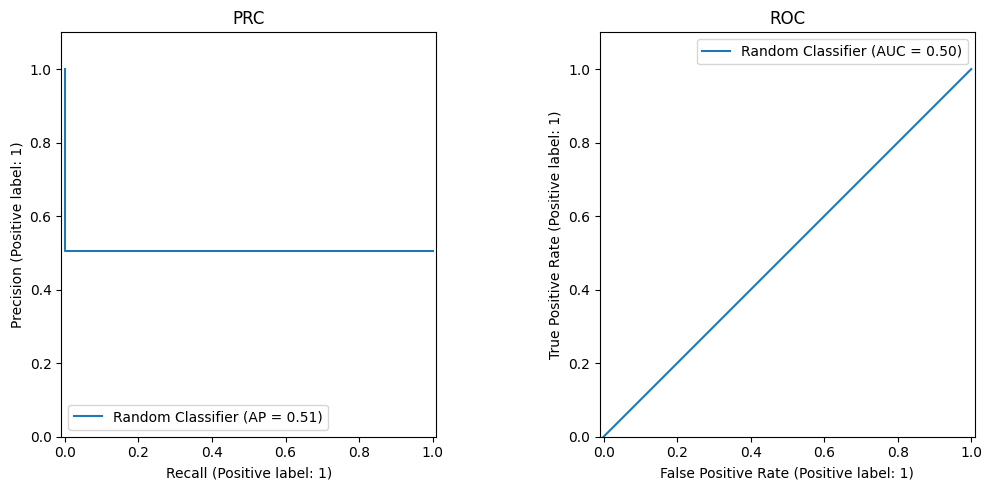

In [17]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    print(classifier_name, 'metrics')
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
    print('AUC-PR: %.4f' % average_precision_score(y_true, y_pred))
    ax[0].set_title("PRC")
    ax[0].set_ylim(0, 1.1)

    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
    print('AUC-ROC: %.4f' % roc_auc_score(y_true, y_pred))
    ax[1].set_title("ROC")
    ax[1].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.legend()


depict_pr_roc(y_test, y_random, 'Random Classifier')

Также посчитаем другие метрики на основе лейблов.

**Задание:** Дополните код по рассчету метрик.

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):

    tp = np.sum( (y_true == 1) * (y_pred == 1))
    fp = np.sum((y_true == 0) * (y_pred == 1)) 
    fn = np.sum((y_true == 1) * (y_pred == 0))
    tn = np.sum( (y_true == 0) * (y_pred == 0))

    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [19]:
# dataframe для сравнения
# методов классификации по метрикам
df_metrics = pd.DataFrame(
    columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc_score', 'reg_const']
)
precision, recall, _ = precision_recall_curve(y_test, y_random)
# добавление очередной строки с характеристиками метода
[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, random_preds)
df_metrics.loc['Random Classifier'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# по аналогии результаты следующих экспериментов можно будет собрать в табличку
df_metrics

,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Random Classifier,0.518,0.482,0.523938,0.512195,0.518,0.505667,0.5,0.0


In [20]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7713333333333333

In [21]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1] 

metrics = quality_metrics_report(y_test, y_pred)

df_metrics = pd.DataFrame({
    'Metric': ['True Positive', 'False Positive', 'False Negative', 'True Negative', 
               'Accuracy', 'Error Rate', 'Precision', 'Recall', 'F1-score'],
    'Value': metrics
})

df_metrics = pd.concat([df_metrics, pd.DataFrame({
    'Metric': ['AUC-ROC', 'AUC-PR'],
    'Value': [roc_auc_score(y_test, y_pred_proba), average_precision_score(y_test, y_pred_proba)]
})], ignore_index=True)

print(df_metrics)

            Metric        Value
0    True Positive  1169.000000
1   False Positive   338.000000
2   False Negative   348.000000
3    True Negative  1145.000000
4         Accuracy     0.771333
5       Error Rate     0.228667
6        Precision     0.775713
7           Recall     0.770600
8         F1-score     0.773148
9          AUC-ROC     0.847872
10          AUC-PR     0.829386


Согласуются ли метрики? В чем может быть проблема accuracy?

**Задание**: Соберите табличку для разных классификаторов.

**Задание**: Постройте график PR-curve, ROC-curve для лучшего из них

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Dummy Classifier": DummyClassifier(strategy="stratified", random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0.5]*len(X_test)
    
    metrics = quality_metrics_report(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": metrics[4],
        "Precision": metrics[6],
        "Recall": metrics[7],
        "F1-score": metrics[8],
        "AUC-ROC": roc_auc_score(y_test, y_proba),
        "AUC-PR": average_precision_score(y_test, y_proba)
    })

df_metrics = pd.DataFrame(results)
print(df_metrics)

                 Model  Accuracy  Precision    Recall  F1-score   AUC-ROC  \
0  Logistic Regression  0.771333   0.775713  0.770600  0.773148  0.847872   
1        Random Forest  0.939667   0.940633  0.940013  0.940323  0.982986   
2     Dummy Classifier  0.503667   0.509309  0.504944  0.507117  0.503652   

     AUC-PR  
0  0.829386  
1  0.978859  
2  0.507506  


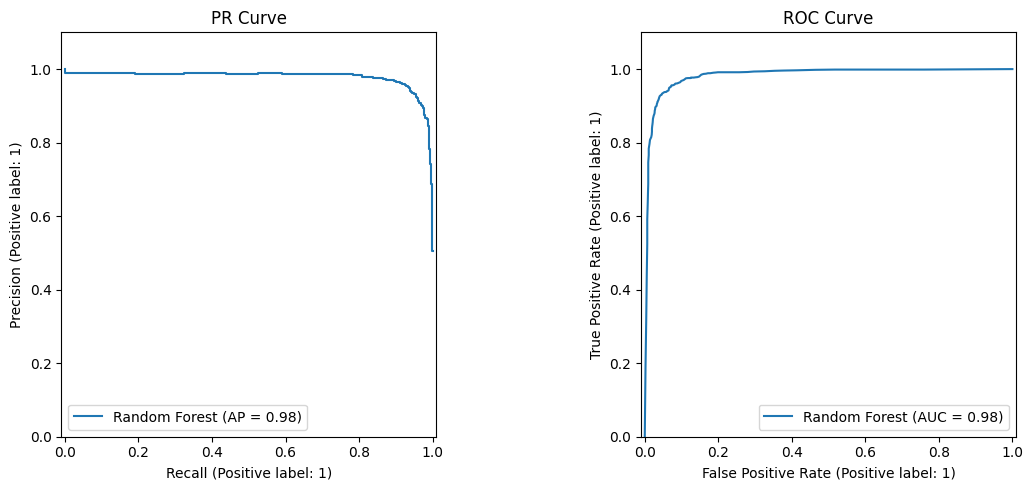

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_proba = best_model.predict_proba(X_test)[:, 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax1, name="Random Forest")
ax1.set_title("PR Curve")
ax1.set_ylim(0, 1.1)

RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax2, name="Random Forest")
ax2.set_title("ROC Curve")
ax2.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

**Задание:** Постройте таблицу точности для набора данных wbdc. Сделайте по таблице метрик на обучающей и тестовой выборках. В таблице сравните разные преобразования признаков и гиперпараметры (регуляризацию). Можно сделать три-четыре эксперимента. 
- На каком эксперименте получилось достичь лучшего качества на трейне?
- А на тесте?
- Переобучается ли модель?

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import pandas as pd

def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0.5]*len(X_test)
    
    metrics_train = quality_metrics_report(y_train, y_pred_train)
    metrics_test = quality_metrics_report(y_test, y_pred_test)
    
    return {
        "Experiment": name,
        "Train Accuracy": metrics_train[4],
        "Test Accuracy": metrics_test[4],
        "Train F1": metrics_train[8],
        "Test F1": metrics_test[8],
        "Test AUC-ROC": roc_auc_score(y_test, y_proba_test),
        "Test AUC-PR": average_precision_score(y_test, y_proba_test)
    }

experiments = [
    ("Baseline", LogisticRegression(random_state=42)),
    ("StandardScaler", make_pipeline(StandardScaler(), LogisticRegression(random_state=42))),
    ("L2 Regularization (C=0.1)", make_pipeline(StandardScaler(), LogisticRegression(C=0.1, random_state=42))),
    ("PCA + LogisticRegression", make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression(random_state=42)))
]

results = []
for name, model in experiments:
    results.append(evaluate_model(model, X_train, X_test, y_train, y_test, name))

df_results = pd.DataFrame(results)
print(df_results)

                  Experiment  Train Accuracy  Test Accuracy  Train F1  \
0                   Baseline        0.779429       0.771333  0.778670   
1             StandardScaler        0.779571       0.771333  0.778781   
2  L2 Regularization (C=0.1)        0.779571       0.771000  0.778718   
3   PCA + LogisticRegression        0.779571       0.771333  0.778781   

    Test F1  Test AUC-ROC  Test AUC-PR  
0  0.773148      0.847872     0.829386  
1  0.773148      0.847868     0.829377  
2  0.772893      0.847828     0.829487  
3  0.773148      0.847868     0.829377  


- На каком эксперименте получилось достичь лучшего качества на трейне?
Все эксперименты, кроме Baseline, показали одинаковый результат. Baseline немного хуже.

- А на тесте?
Все эксперименты, кроме L2-регуляризации, показали одинаковое качество на тесте. L2-регуляризация немного ухудшила результат.

- Переобучается ли модель?
Разница между трейном и тестом очень мала (<1%), что указывает на отсутствие переобучения.